<a href="https://colab.research.google.com/github/leonardopiana/Bootcamp_Data_Science_Alura/blob/main/Notebooks/Modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1

In [1]:
url = 'https://github.com/leonardopiana/Bootcamp_Data_Science_Alura/raw/main/Dados/dados_covid_sp.zip'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv(url, sep = ';')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [5]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format = '%Y-%m-%d')

In [6]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

In [7]:
import seaborn as sns

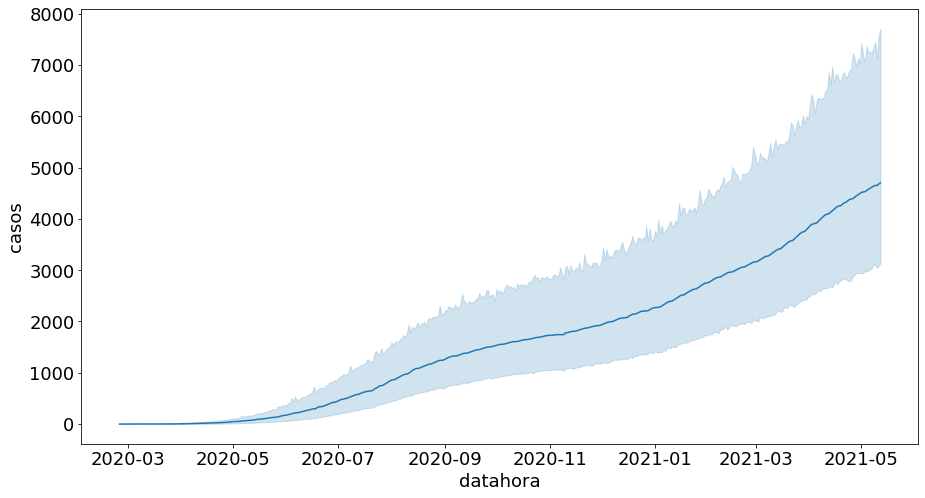

In [8]:
sns.lineplot(x = 'datahora', y = 'casos', data = dados)

$$ e^x $$

In [9]:
import numpy as np

In [10]:
eixo_x = np.linspace(-2,2,100)

In [11]:
y_exp = np.exp(eixo_x)

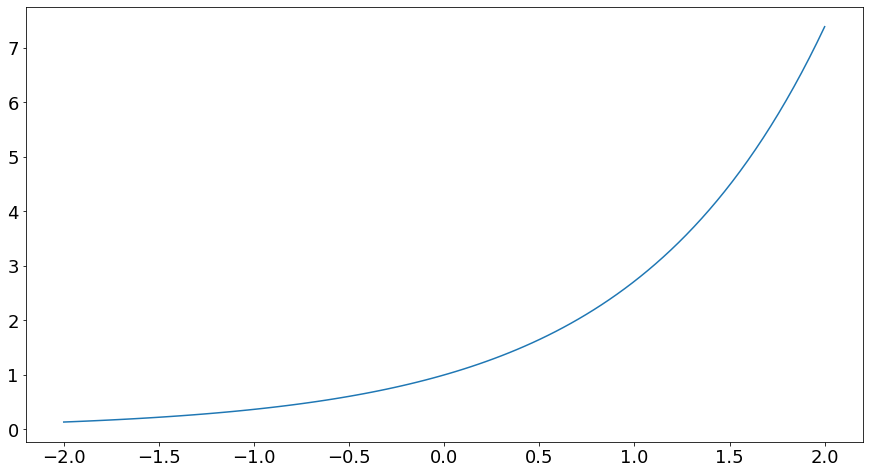

In [12]:
sns.lineplot(x = eixo_x, y = y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

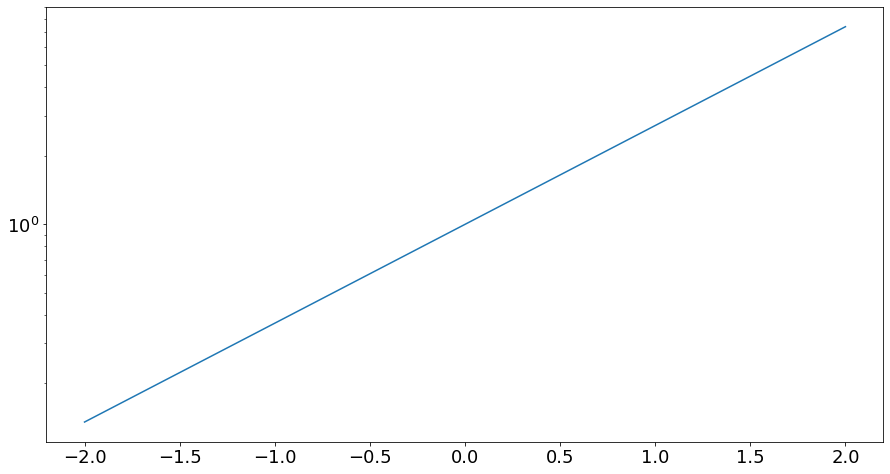

In [13]:
sns.lineplot(x = eixo_x, y= y_exp)
mpl.pyplot.yscale('log')

In [14]:
dados_sp = dados.query('nome_munic == "São Paulo"')

In [15]:
dados_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 562 to 285652
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nome_munic     443 non-null    object        
 1   codigo_ibge    443 non-null    int64         
 2   dia            443 non-null    int64         
 3   mes            443 non-null    int64         
 4   datahora       443 non-null    datetime64[ns]
 5   casos          443 non-null    int64         
 6   casos_novos    443 non-null    int64         
 7   casos_pc       443 non-null    object        
 8   casos_mm7d     443 non-null    object        
 9   obitos         443 non-null    int64         
 10  obitos_novos   443 non-null    int64         
 11  obitos_pc      443 non-null    object        
 12  obitos_mm7d    443 non-null    object        
 13  letalidade     443 non-null    object        
 14  nome_ra        443 non-null    object        
 15  cod_ra         443

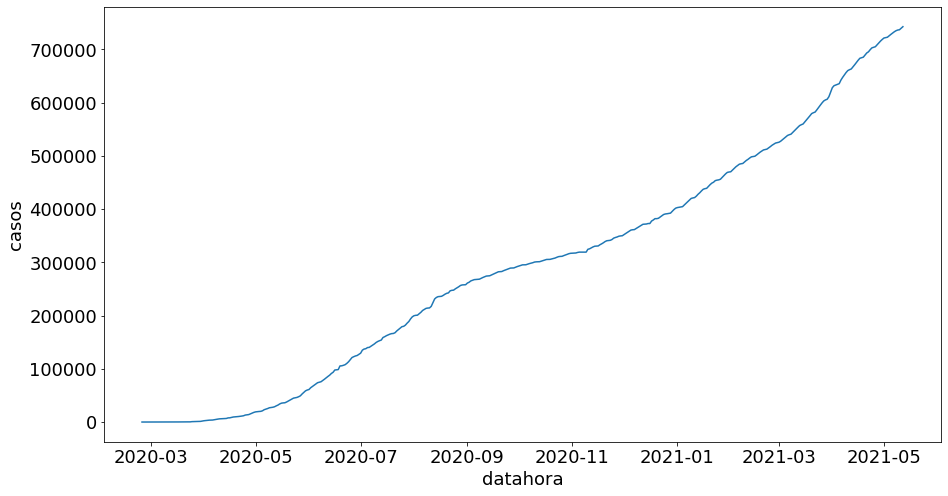

In [16]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)

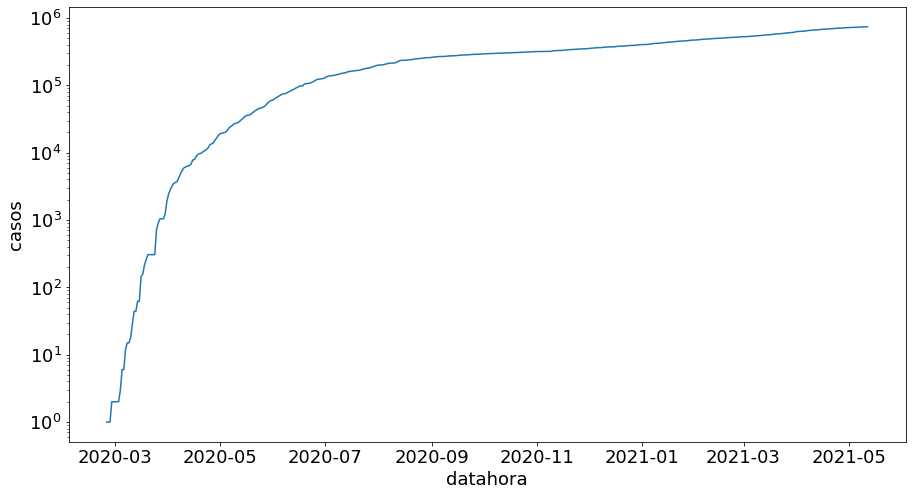

In [17]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log')

In [18]:
cidade = ['Campinas']
dados_camp = dados[dados.nome_munic.isin(cidade)]

In [19]:
dados_camp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 108 to 285198
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nome_munic     443 non-null    object        
 1   codigo_ibge    443 non-null    int64         
 2   dia            443 non-null    int64         
 3   mes            443 non-null    int64         
 4   datahora       443 non-null    datetime64[ns]
 5   casos          443 non-null    int64         
 6   casos_novos    443 non-null    int64         
 7   casos_pc       443 non-null    object        
 8   casos_mm7d     443 non-null    object        
 9   obitos         443 non-null    int64         
 10  obitos_novos   443 non-null    int64         
 11  obitos_pc      443 non-null    object        
 12  obitos_mm7d    443 non-null    object        
 13  letalidade     443 non-null    object        
 14  nome_ra        443 non-null    object        
 15  cod_ra         443

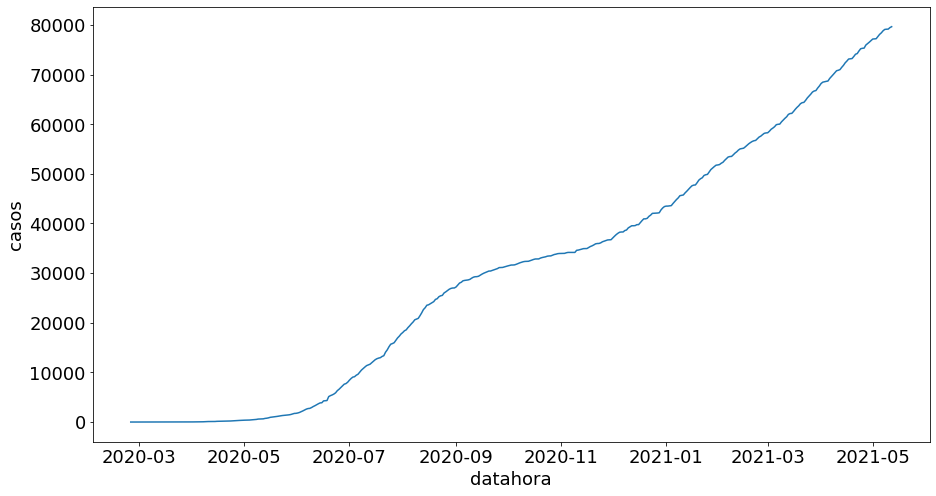

In [20]:
sns.lineplot(x='datahora', y='casos', data=dados_camp)

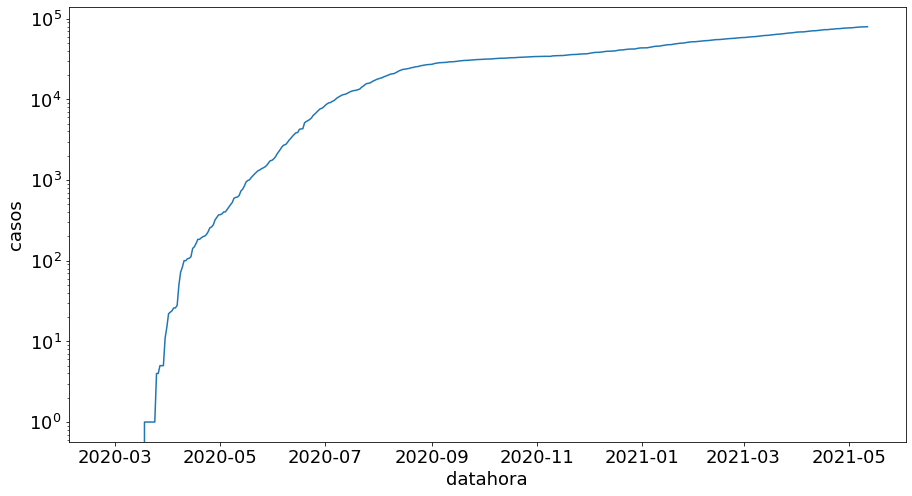

In [21]:
sns.lineplot(x='datahora', y='casos', data=dados_camp)
mpl.pyplot.yscale('log')

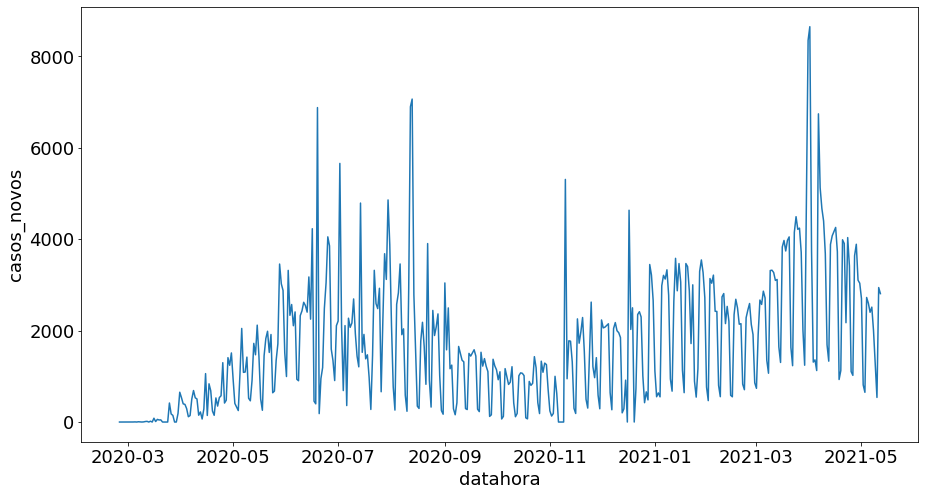

In [22]:
sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp)

In [23]:
dados_exemplo = pd.DataFrame(data = np.linspace(1,10,10))
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [24]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

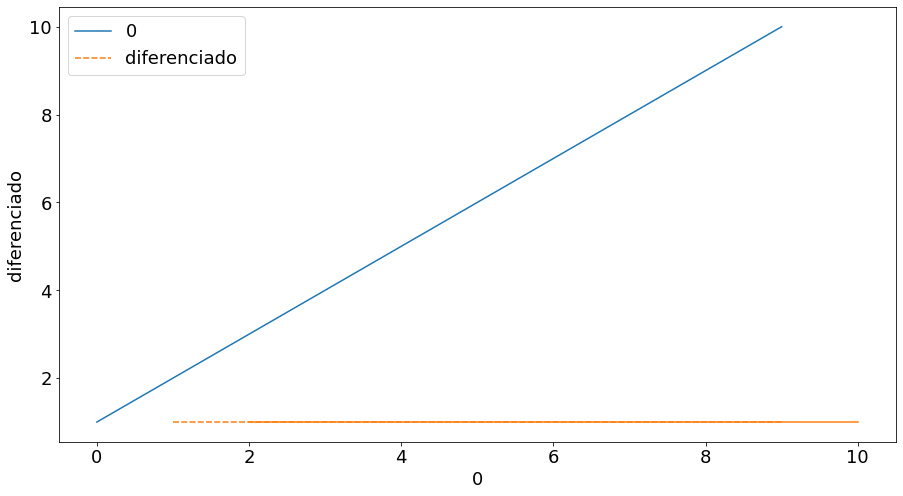

In [25]:
sns.lineplot(data = dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data=dados_exemplo)

In [26]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

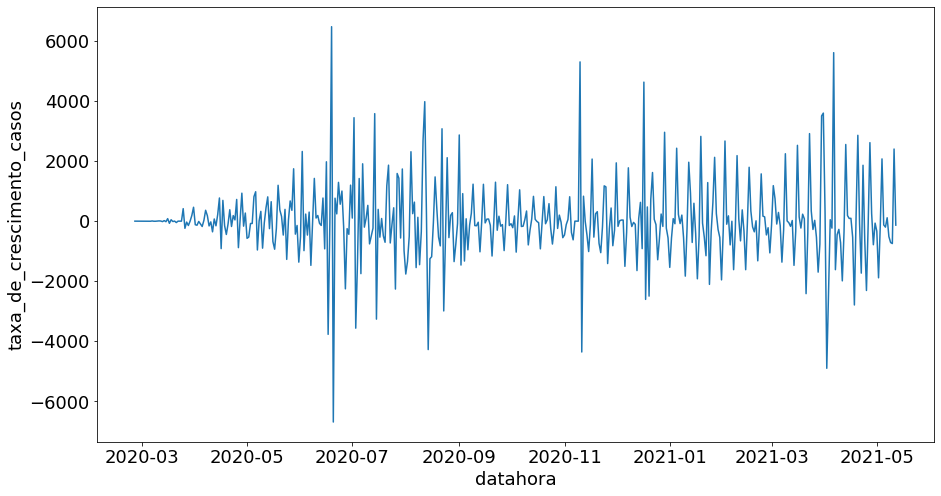

In [27]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)

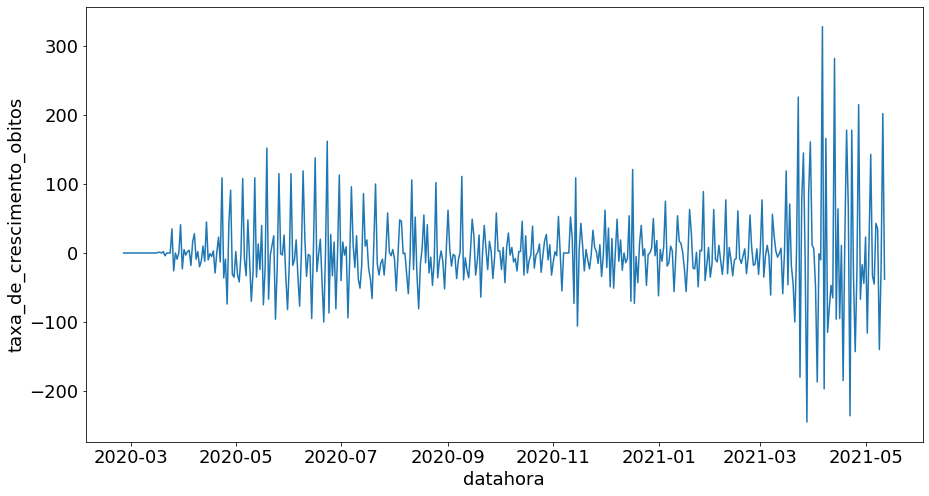

In [28]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

In [29]:
import matplotlib.pyplot as plt

<BarContainer object of 443 artists>

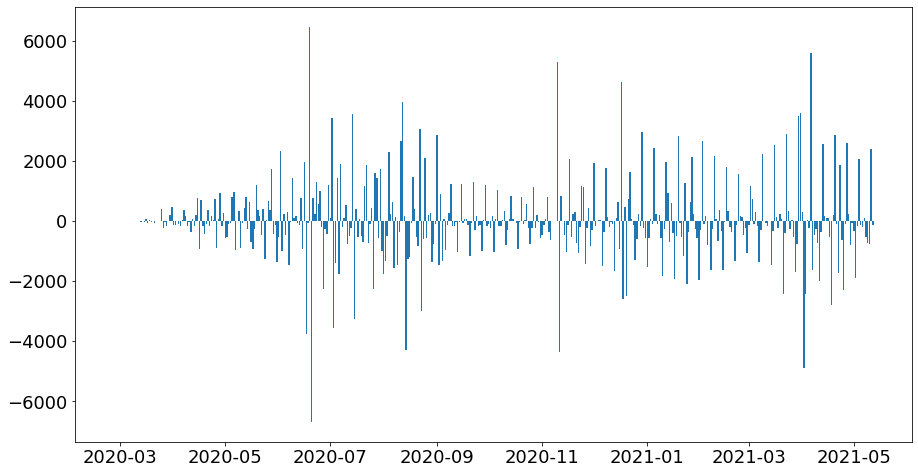

In [30]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [31]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [32]:
dados_2021 = dados_sp.query('ano == 2021')

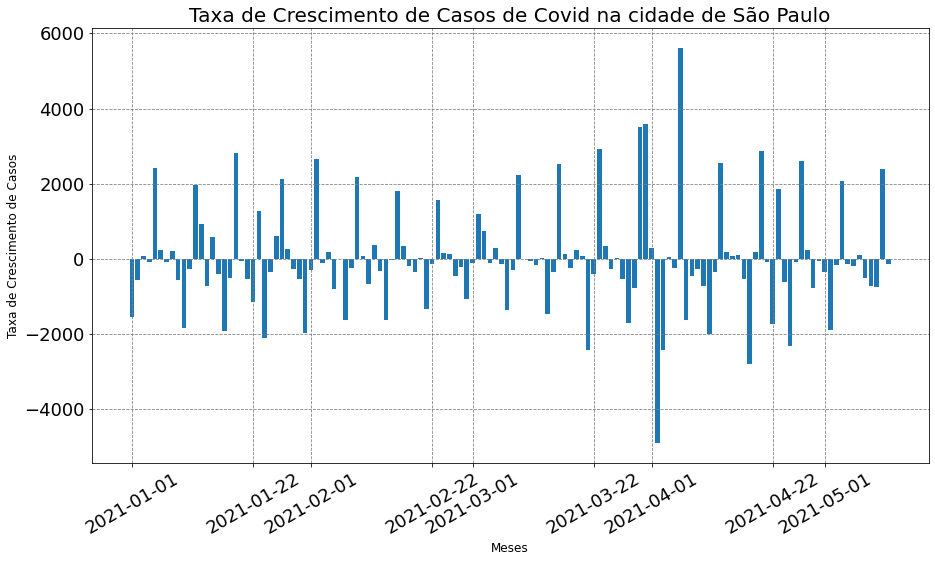

In [33]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])
plt.grid(linestyle = "--", color = 'grey')
plt.title("Taxa de Crescimento de Casos de Covid na cidade de São Paulo", fontsize = 20)
plt.ylabel("Taxa de Crescimento de Casos", fontsize = 12)
plt.xlabel("Meses", fontsize = 12)
plt.xticks(rotation=30)
#plt.xticks(np.arange(1, 1, step=1))
plt.show()

In [34]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window = 7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center=False).mean()

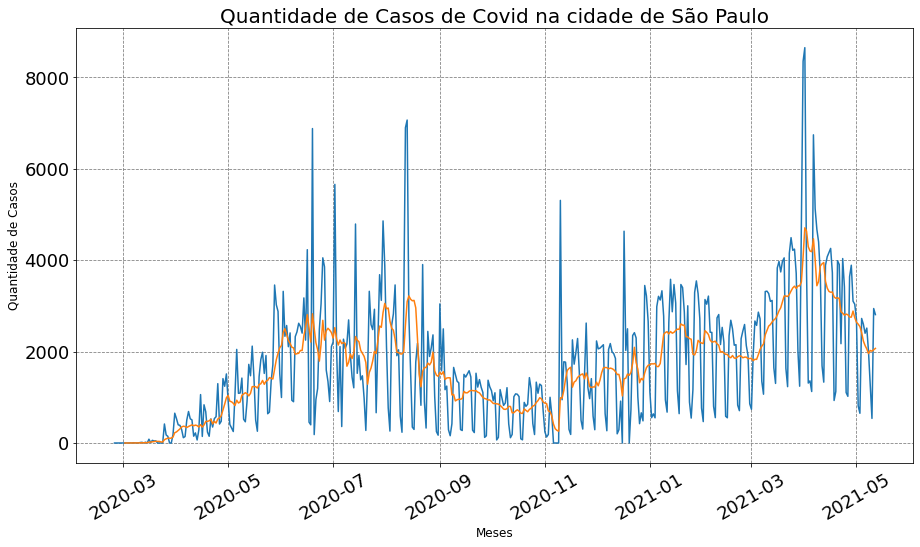

In [35]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)
plt.grid(linestyle = "--", color = 'grey')
plt.title("Quantidade de Casos de Covid na cidade de São Paulo", fontsize = 20)
plt.ylabel("Quantidade de Casos", fontsize = 12)
plt.xlabel("Meses", fontsize = 12)
plt.xticks(rotation=30)
plt.show()

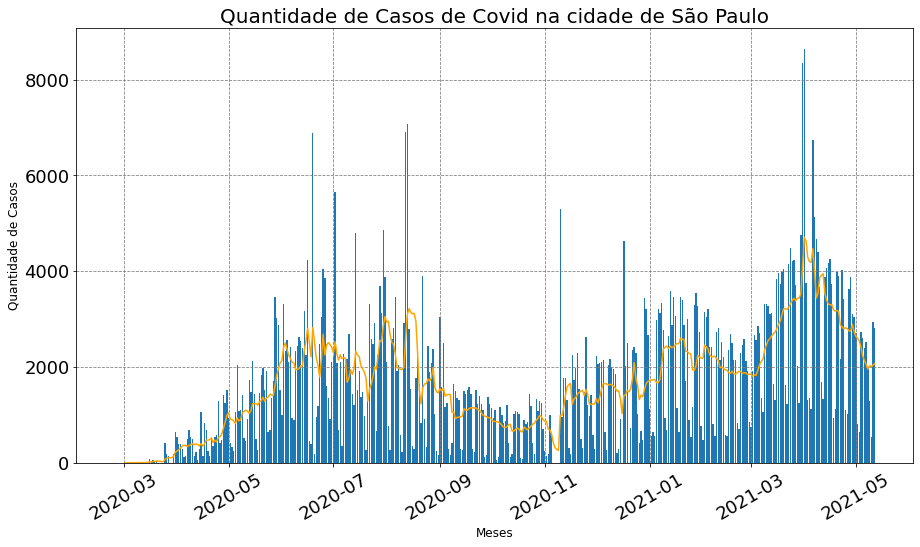

In [36]:
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'])
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp, color='orange')
plt.grid(linestyle = "--", color = 'grey')
plt.title("Quantidade de Casos de Covid na cidade de São Paulo", fontsize = 20)
plt.ylabel("Quantidade de Casos", fontsize = 12)
plt.xlabel("Meses", fontsize = 12)
plt.xticks(rotation=30)
plt.show()

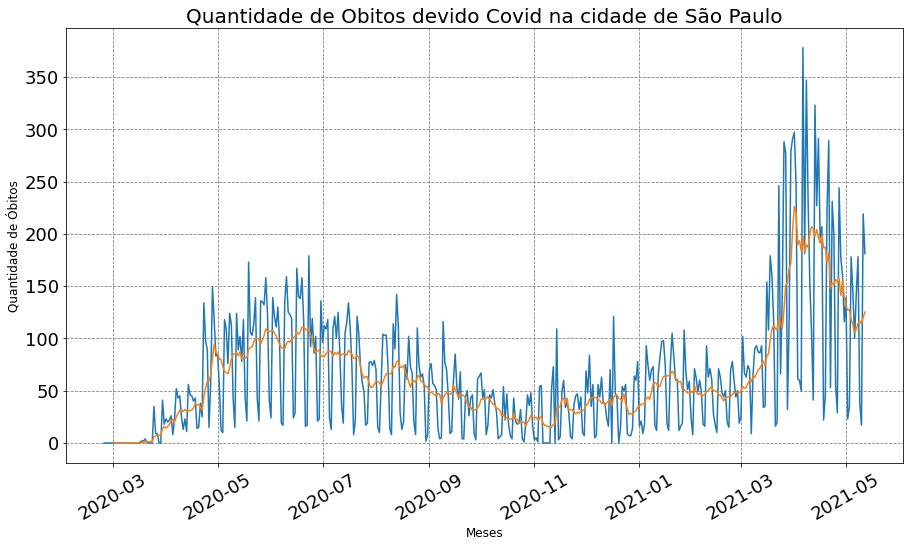

In [37]:
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp)
plt.grid(linestyle = "--", color = 'grey')
plt.title("Quantidade de Obitos devido Covid na cidade de São Paulo", fontsize = 20)
plt.ylabel("Quantidade de Óbitos", fontsize = 12)
plt.xlabel("Meses", fontsize = 12)
plt.xticks(rotation=30)
plt.show()

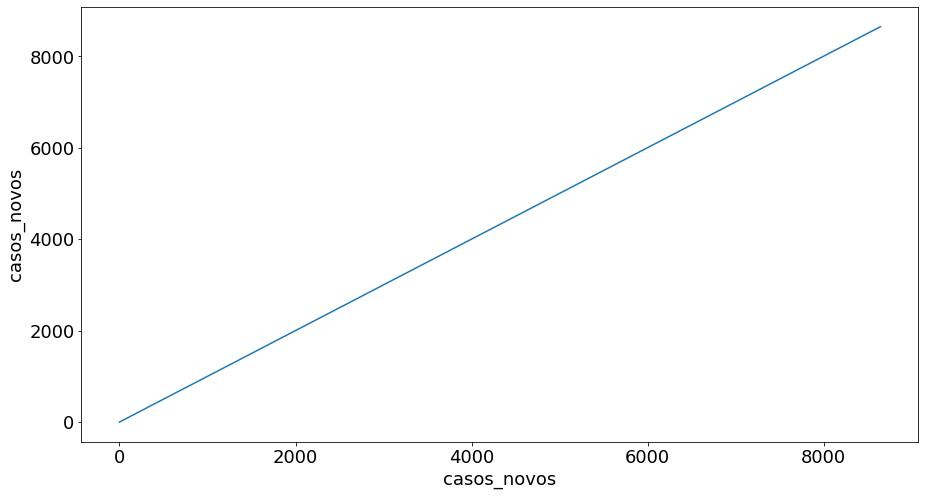

In [38]:
sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

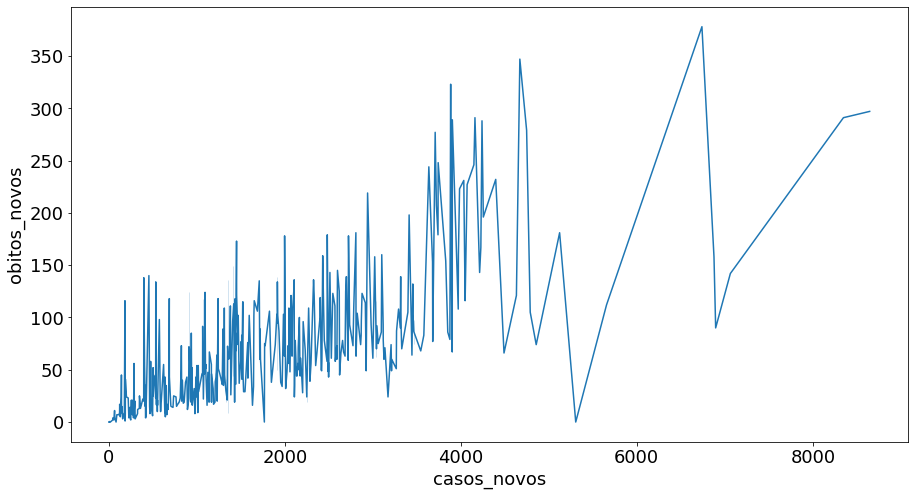

In [39]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

In [40]:
dados_sp_obitos_dias = dados_sp['obitos_novos'][30:]

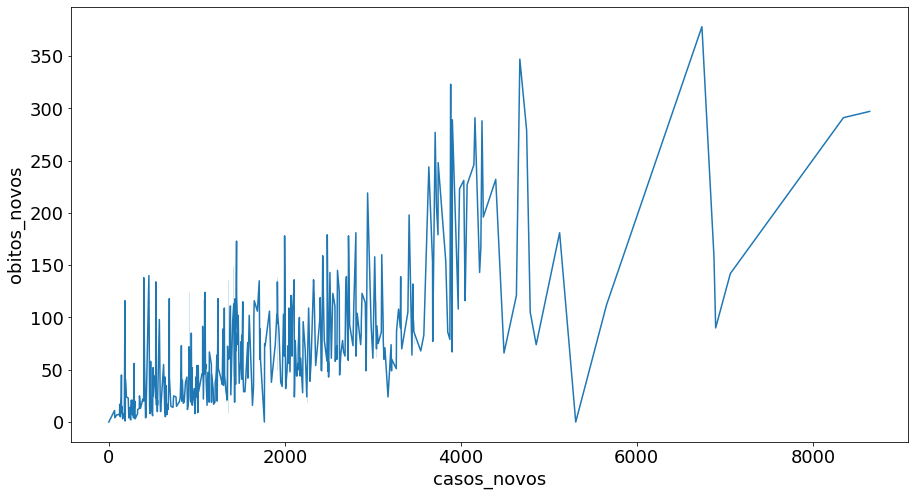

In [41]:
sns.lineplot(x=dados_sp['casos_novos'], y=dados_sp_obitos_dias)

Desafio: Plotar o número de óbitos com uma janela alguns dias a frente;
  
  Eu tentei plotar com algumas janelas diferentes, mas não sei se não fiz do jeito certo, porque parece que não mudou praticamente nada, mesmo quando olhei os gráficos sobrepostos. Vou esperar sair a resolução para verificar como fizeram.

In [42]:
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dados_202102 = dados_sp.query('mes==2 & ano==2021')

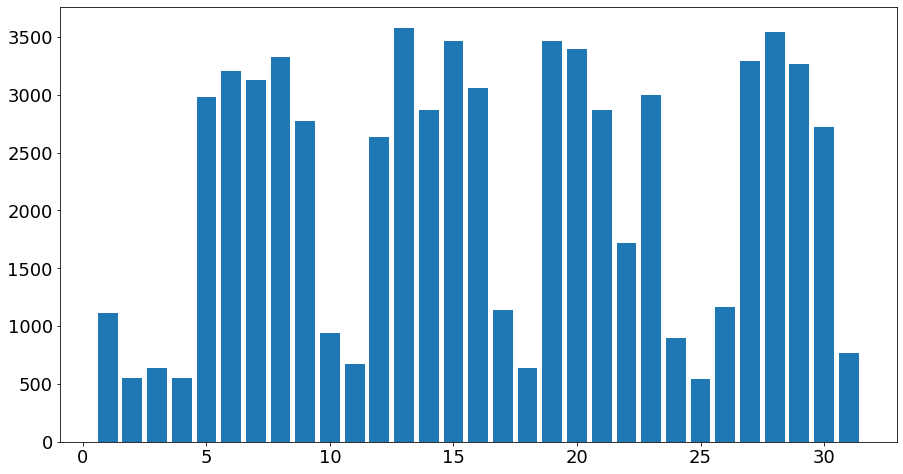

<BarContainer object of 28 artists>

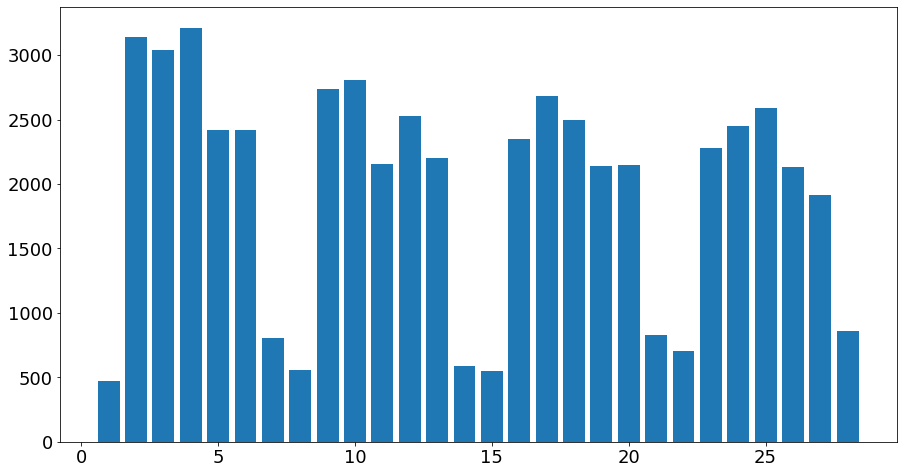

In [43]:
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'])

In [44]:
from pandas.plotting import autocorrelation_plot

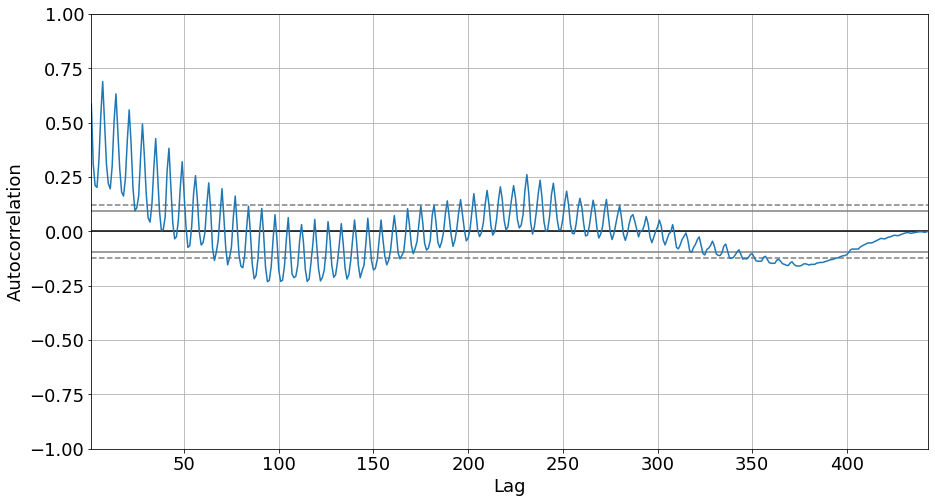

In [45]:
autocorrelation_plot(dados_sp['casos_novos'])

In [46]:
dados.shape

(286178, 26)

In [47]:
aleatorio = np.random.rand(443)

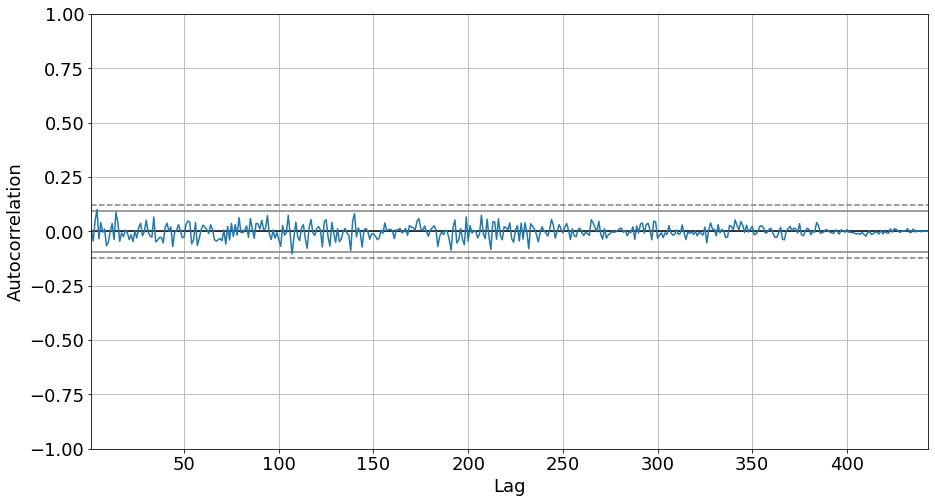

In [48]:
autocorrelation_plot(aleatorio)

### Desafio: Função de Correlação cruzada dos óbitos e casos.
(usar biblioteca statsmodels do python)

#Aula 2

In [64]:
df = pd.DataFrame()

In [132]:
df['ds'] = dados_sp['datahora'][:400]

In [133]:
df['y'] = dados_sp['casos_novos'][:400]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 562 to 257917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      400 non-null    datetime64[ns]
 1   y       400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.4 KB


In [135]:
from fbprophet import Prophet

In [136]:
modelo = Prophet()

In [137]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [138]:
df_futuro = modelo.make_future_dataframe(periods=63)

In [139]:
df_futuro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      463 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.7 KB


In [140]:
previsao = modelo.predict(df_futuro)

In [96]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-137.621348,-766.225738,1452.675550,-137.621348,-137.621348,457.699352,457.699352,457.699352,457.699352,457.699352,457.699352,0.0,0.0,0.0,320.078004
1,2020-02-26,-119.843618,-757.563378,1398.820327,-119.843618,-119.843618,456.859942,456.859942,456.859942,456.859942,456.859942,456.859942,0.0,0.0,0.0,337.016324
2,2020-02-27,-102.065887,-564.426141,1504.065622,-102.065887,-102.065887,596.079908,596.079908,596.079908,596.079908,596.079908,596.079908,0.0,0.0,0.0,494.014021
3,2020-02-28,-84.288157,-811.844120,1316.409663,-84.288157,-84.288157,340.781628,340.781628,340.781628,340.781628,340.781628,340.781628,0.0,0.0,0.0,256.493471
4,2020-02-29,-66.510426,-1081.227743,1061.038764,-66.510426,-66.510426,59.114795,59.114795,59.114795,59.114795,59.114795,59.114795,0.0,0.0,0.0,-7.395631


In [141]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

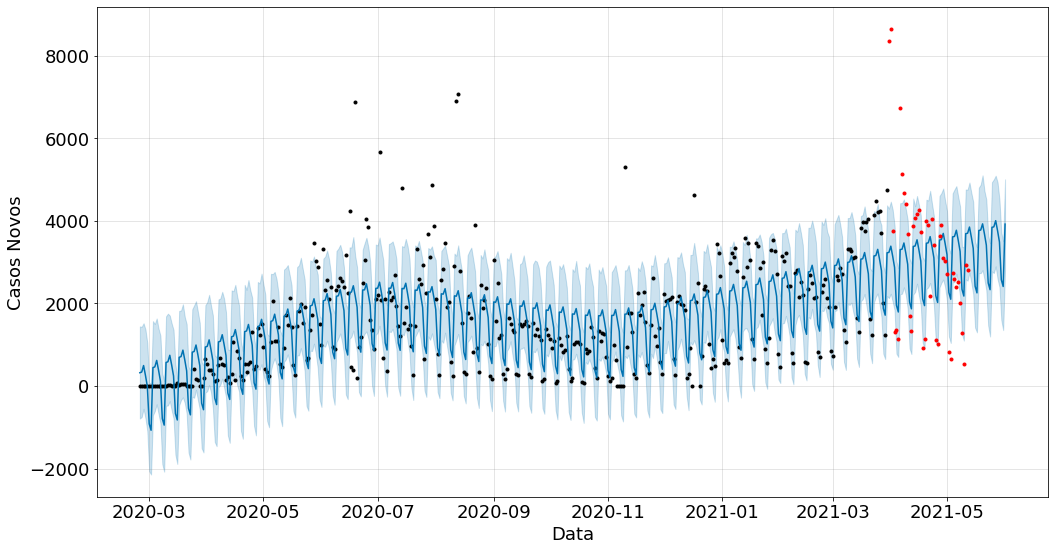

In [142]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(15,8));
plt.plot(df_teste['ds'], df_teste['y'], '.r')

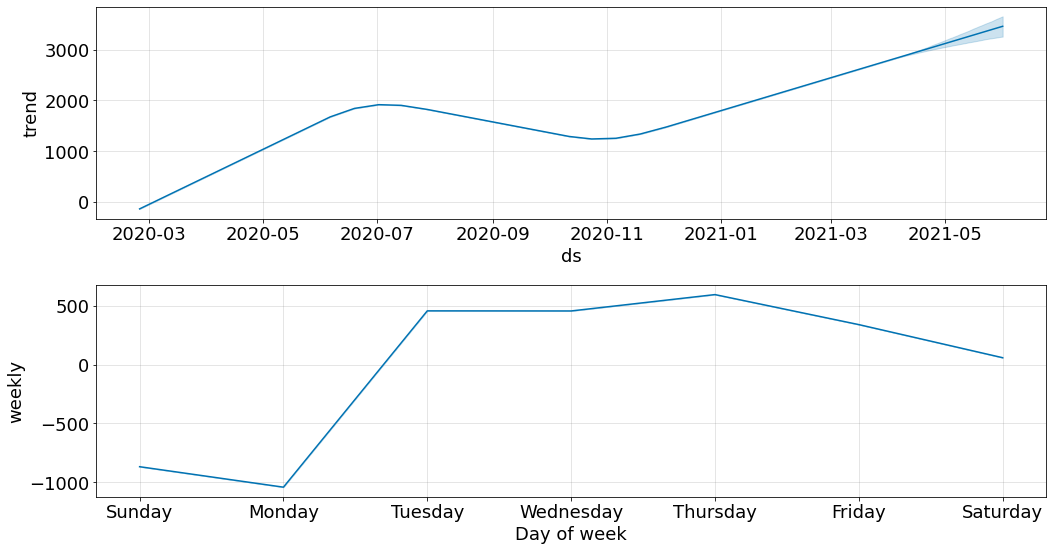

In [143]:
modelo.plot_components(previsao, figsize=(15,8));